This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
import seaborn as sns


In [2]:
data = pd.read_csv("diabetes.csv")
data.shape

(768, 9)

In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# About this file
Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#show distribution of Pregnancies

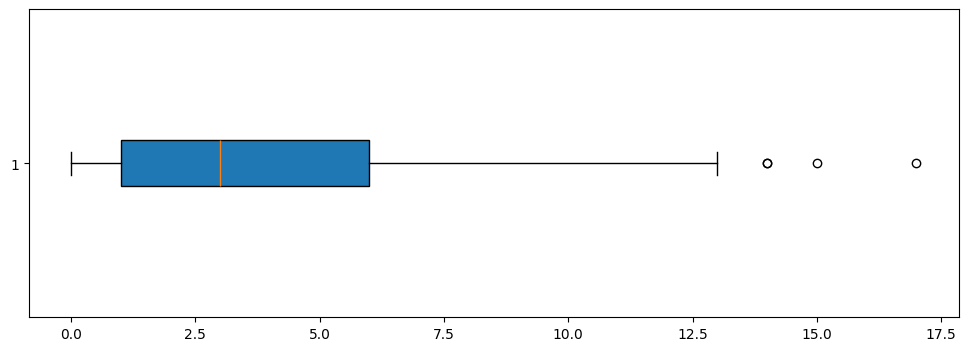

In [6]:
# Create a box plot
plt.figure(figsize=(12,4))
plt.boxplot(data.Pregnancies,vert=False, patch_artist=True)
plt.show()

#We conclude that most pregnancies range from one to five pregnancies

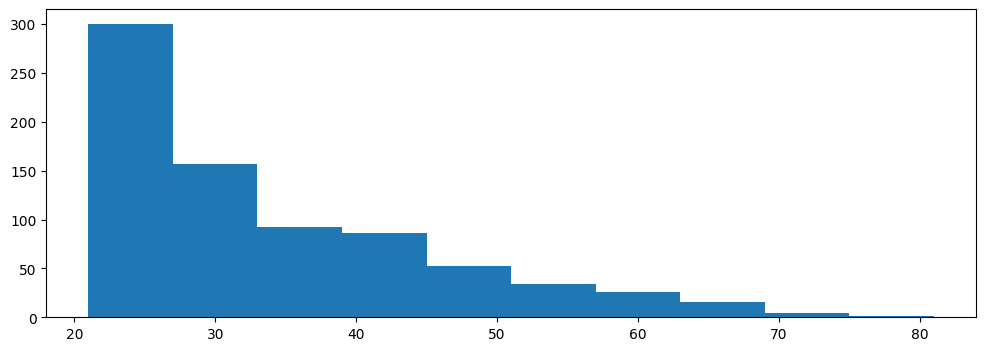

In [7]:
plt.figure(figsize=(12,4))
plt.hist(data.Age)
plt.show()

#It was concluded that the most common age group is the twenty-thirty-year-old group, and most of the groups range from 20 to 80 years old.

In [8]:
#know how classes in outcome column  
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [9]:
# Create a MinMaxScaler
scaler = MinMaxScaler()

In [10]:
# Fit the scaler to your data and transform it
normalized_data = scaler.fit_transform(data)
normalized_data

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.10119556, 0.03333333,
        0.        ]])

In [11]:
# Define headers for your columns
headers = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

# Create a DataFrame with headers
df_normalized = pd.DataFrame(normalized_data, columns=headers)
df_normalized

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [12]:
X=df_normalized.iloc[:,0:-1]
Y=df_normalized.iloc[:,-1]

In [13]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=.2,random_state=424)

In [14]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

LogisticRegression()

In [15]:
# Make predictions on the testing data
predictions = model.predict(X_test)

In [16]:
result = pd.DataFrame({'Actual' : Y_test, 'Predicted' : predictions})
result

,Actual,Predicted
28,0.0,1.0
142,0.0,0.0
120,1.0,1.0
253,0.0,0.0
644,0.0,0.0
...,...,...
513,0.0,0.0
353,0.0,0.0
39,1.0,1.0
647,1.0,1.0


In [17]:
# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.7272727272727273

In [18]:
cf_matrix = confusion_matrix(Y_test, predictions)
cf_matrix

array([[91, 16],
       [26, 21]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

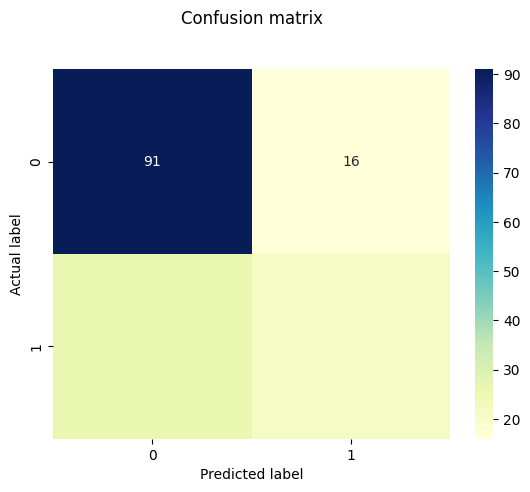

In [19]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
# Generate and print the classification report
report = classification_report(Y_test, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       107
         1.0       0.57      0.45      0.50        47

    accuracy                           0.73       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.71      0.73      0.72       154

